In [35]:
import pandas as pd  #for data manipulation operations
import numpy as np  #for numeric operations on data
import seaborn as sns  #for data visualization operations
import pandas_profiling as pp
import matplotlib.pyplot as plt  #for data visualization operations
from sklearn.preprocessing import LabelEncoder # for encoding
from sklearn.preprocessing import StandardScaler #for standardization

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import plot_confusion_matrix
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier

from termcolor import colored
#!pip install xgboost
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBRegressor

#!pip install lightgbm
from lightgbm import LGBMRegressor

import os
#ignore warnings
import warnings
warnings.filterwarnings("ignore")

from sklearn import set_config
set_config(print_changed_only = False)

sns.set_theme(style = "whitegrid")

print(colored("\n THE REQUIRED LIBRARIES WERE SUCCESFULLY IMPORTED...", color = "green", attrs = ["bold", "dark"]))

n_cpu = os.cpu_count()
n_thread = n_cpu*2


 THE REQUIRED LIBRARIES WERE SUCCESFULLY IMPORTED...


In [36]:
heart = pd.read_csv("heart_failure_clinical_records_dataset.csv")
df = heart.copy()
df.head(n = 10).style.background_gradient(cmap = "Greens_r").set_properties(**{"font-family" : "Segoe UI"})#.hide_index()

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [38]:
df_eda = pd.DataFrame()

df_eda["age"] = df["age"]
df_eda["anaemia"] = np.where(df["anaemia"] < 1, "no", "yes")
df_eda["creatinine_phosphokinase"] = df["creatinine_phosphokinase"]
df_eda["diabetes"] = np.where(df["diabetes"] < 1, "no", "yes")
df_eda["ejection_fraction"] = df["ejection_fraction"]
df_eda["high_blood_pressure"] = np.where(df["high_blood_pressure"] < 1, "no", "yes")
df_eda["platelets"] = df["platelets"]
df_eda["serum_creatinine"] = df["serum_creatinine"]
df_eda["serum_sodium"] = df["serum_sodium"]
df_eda["sex"] = np.where(df["sex"] < 1, "female", "male")
df_eda["smoking"] = np.where(df["smoking"] < 1, "no", "yes")
df_eda["death_event"] = np.where(df["DEATH_EVENT"] < 1, "no", "yes")

df_eda.head(n = 10).style.background_gradient(cmap = "Greens_r").set_properties(**{"font-family" : "Segoe UI"}).hide_index()

## PANDAS PROFILING

<AxesSubplot:xlabel='age', ylabel='platelets'>

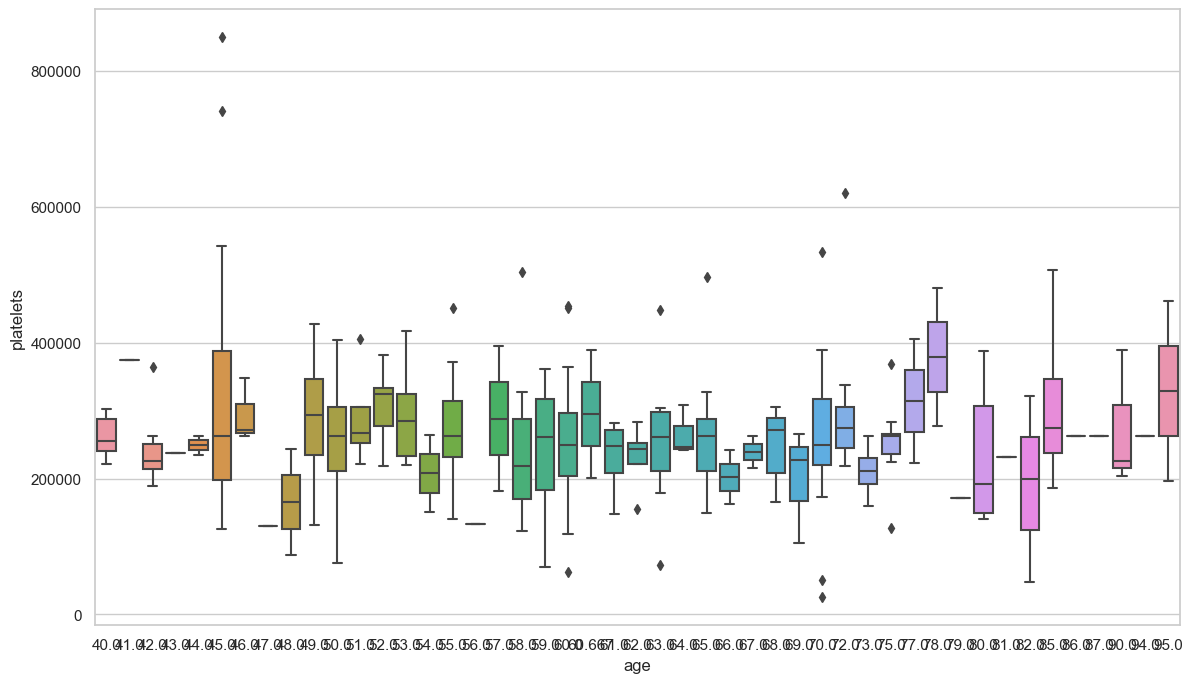

In [39]:
sns.boxplot(x="age", y="platelets", data=df)

In [40]:
pp.ProfileReport(df_eda)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [41]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]
df

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                      1  265000.00               1.9           130    1   
1                      0  263358.03               1.1           136    1   
2                      0  162000.00               1.3           129    1   
3                      0  210000.00               1.9           137    1   
4                      0  327000.00               2.7           116    0   
..                   ...        ...               ...           ...  ...   
294                    1  155000.00               1.1           143    1   
295                    0  270000.00               1.2           139    0   
296                    0  742000.00               0.8           138    0   
297                    0  140000.00               1.4           140    1   
298                    0  395000.00               1.6           136    1   

     smoking  time  DEATH_EVENT  
0          0     4            1  
1          0     6            1  
2          1     7            1  
3          0     7            1  
4          0     8            1  
..       ...   ...          ...  
294        1   270            0  
295        0   271            0  
296        0   278            0  
297        1   280            0  
298        1   285            0  

[299 rows x 13 columns]

In [42]:

df.drop(['time'], axis=1, inplace=True)

In [43]:
# 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 
# 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 
# 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 
# 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 
# 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 
# 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 
# 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 
# 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 
# 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

<AxesSubplot:>

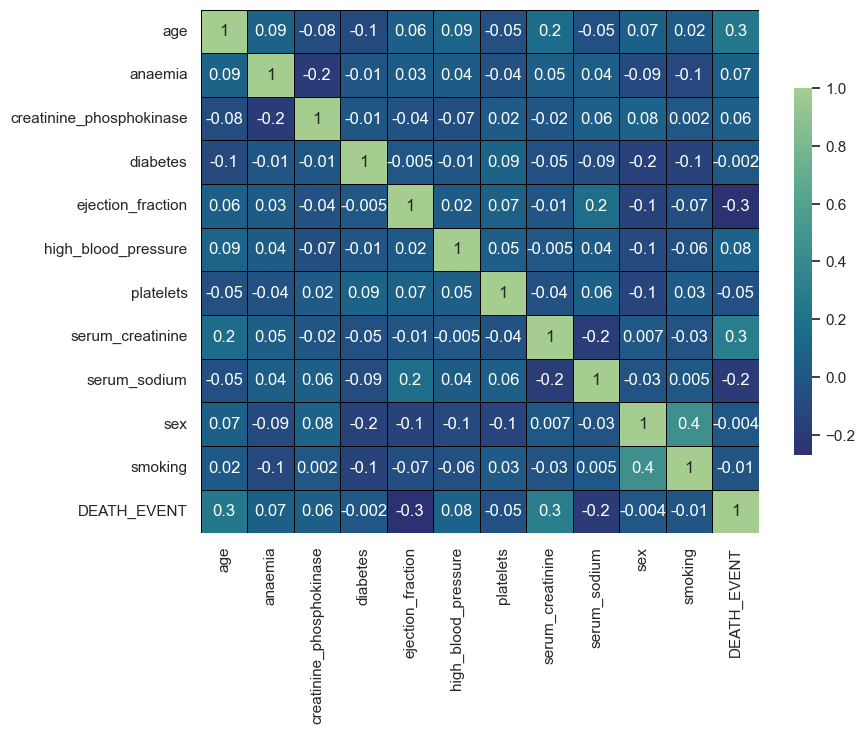

In [44]:
fig = plt.figure(figsize=(9,6.8))
sns.heatmap(df.corr(), annot=True, fmt='.1g', cmap="crest_r", cbar=True, cbar_kws={'shrink' : 0.7}, linewidth=0.6, linecolor='black')

In [45]:
sns.set(font_scale = 1)
sns.set(rc={"figure.figsize":(5, 5)})

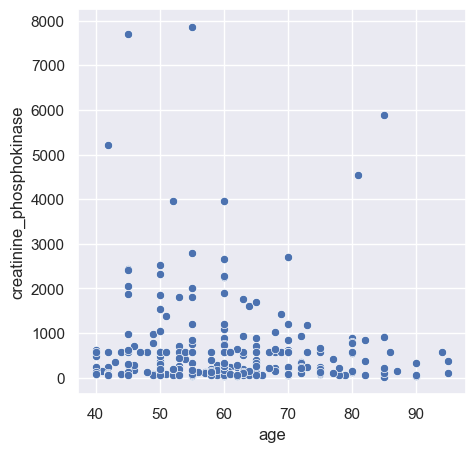

In [46]:

sns.scatterplot(data=df,x='age',y='creatinine_phosphokinase',style=None,palette='twilight_shifted_r')
plt.show()


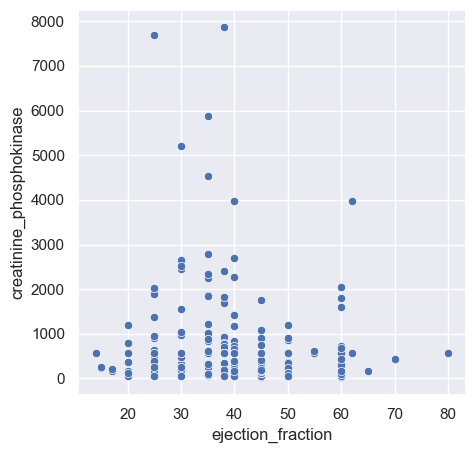

In [47]:

sns.scatterplot(data=df,x='ejection_fraction',y='creatinine_phosphokinase',style=None,palette='ejwction_fraction')
plt.show()


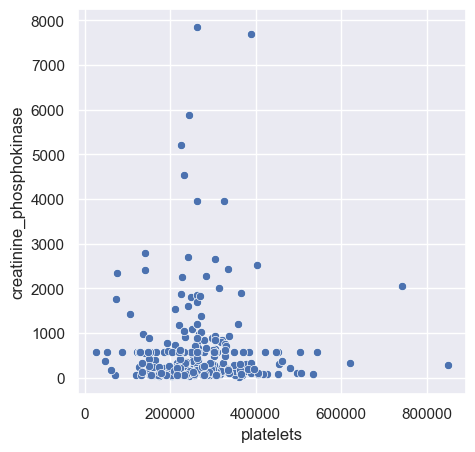

In [48]:
sns.scatterplot(data=df,x='platelets',y='creatinine_phosphokinase',style=None,palette='high_blood_pressure')
plt.show()

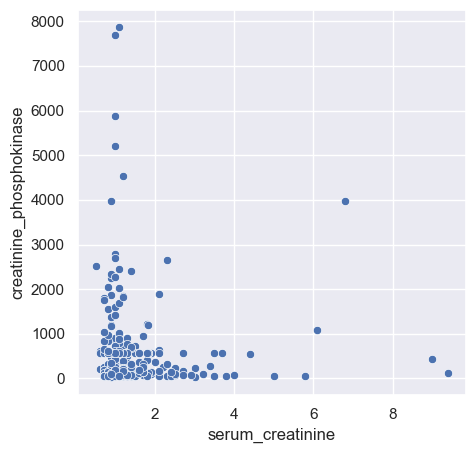

In [49]:
sns.scatterplot(data=df,x='serum_creatinine',y='creatinine_phosphokinase',style=None,palette='high_blood_pressure')
plt.show()

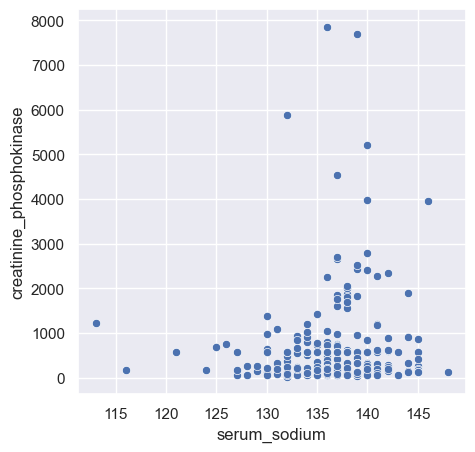

In [50]:
sns.scatterplot(data=df,x='serum_sodium',y='creatinine_phosphokinase',style=None,palette='high_blood_pressure')
plt.show()

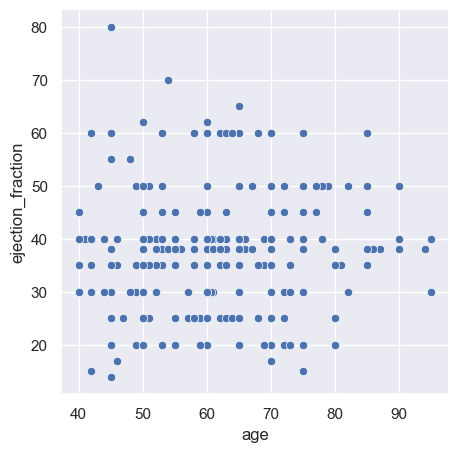

In [51]:
sns.scatterplot(data=df,x='age',y='ejection_fraction',style=None,palette='sex')
plt.show()

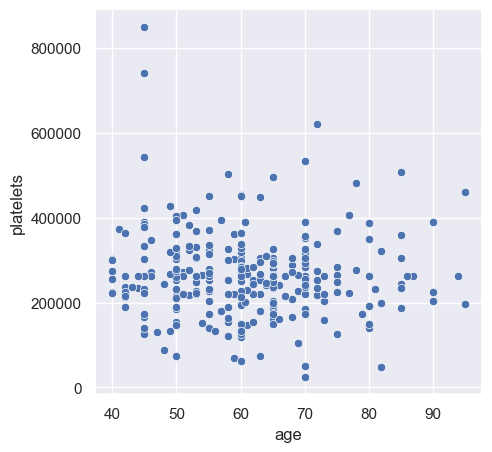

In [52]:
sns.scatterplot(data=df,x='age',y='platelets',style=None,palette='smoking')
plt.show()

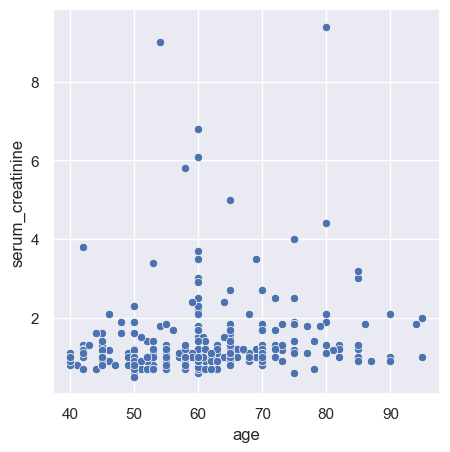

In [53]:
sns.scatterplot(data=df,x='age',y='serum_creatinine',style=None,palette='DEATH_EVENT')
plt.show()

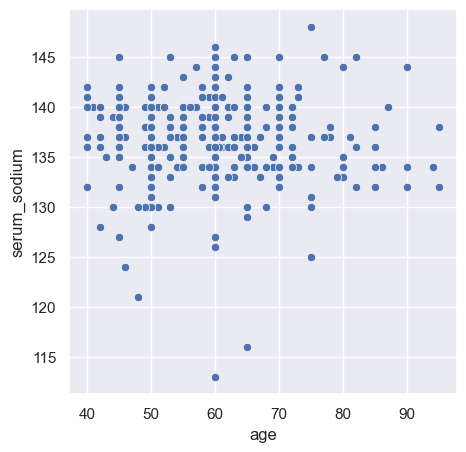

In [54]:
sns.scatterplot(data=df,x='age',y='serum_sodium',style=None,palette='high_blood_pressure')
plt.show()

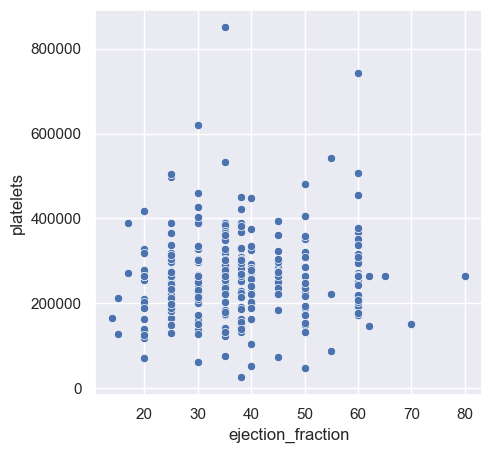

In [55]:
sns.scatterplot(data=df,x='ejection_fraction',y='platelets',style=None,palette='high_blood_pressure')
plt.show()

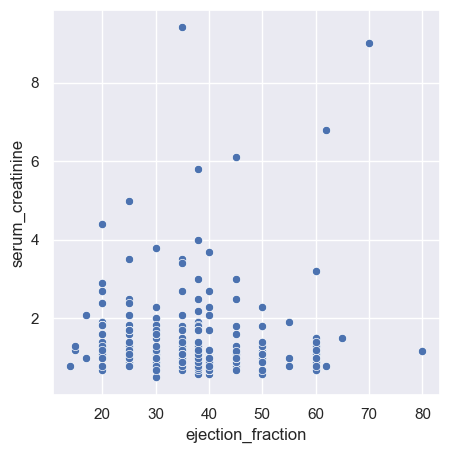

In [56]:
sns.scatterplot(data=df,x='ejection_fraction',y='serum_creatinine',style=None,palette='high_blood_pressure')
plt.show()

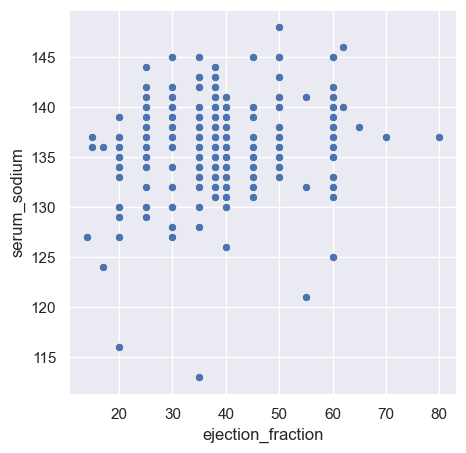

In [57]:
sns.scatterplot(data=df,x='ejection_fraction',y='serum_sodium',style=None,palette='high_blood_pressure')
plt.show()

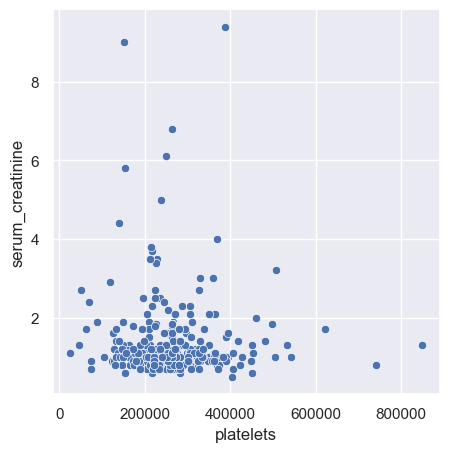

In [58]:
sns.scatterplot(data=df,x='platelets',y='serum_creatinine',style=None,palette='high_blood_pressure')
plt.show()

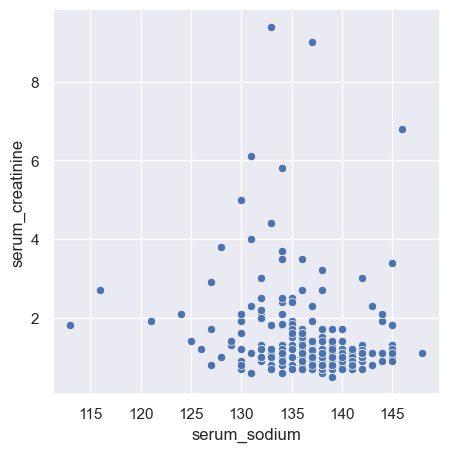

In [59]:
sns.scatterplot(data=df,x='serum_sodium',y='serum_creatinine',style=None,palette='high_blood_pressure')
plt.show()

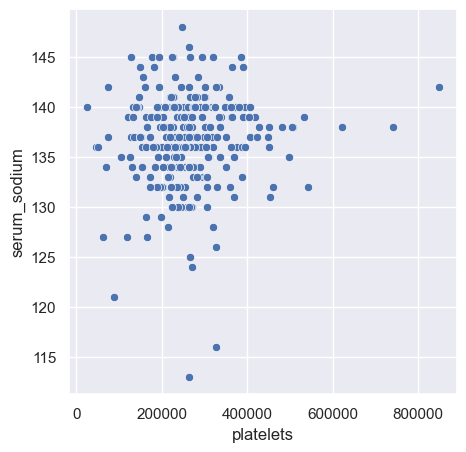

In [60]:
sns.scatterplot(data=df,x='platelets',y='serum_sodium',style=None,palette='high_blood_pressure')
plt.show()

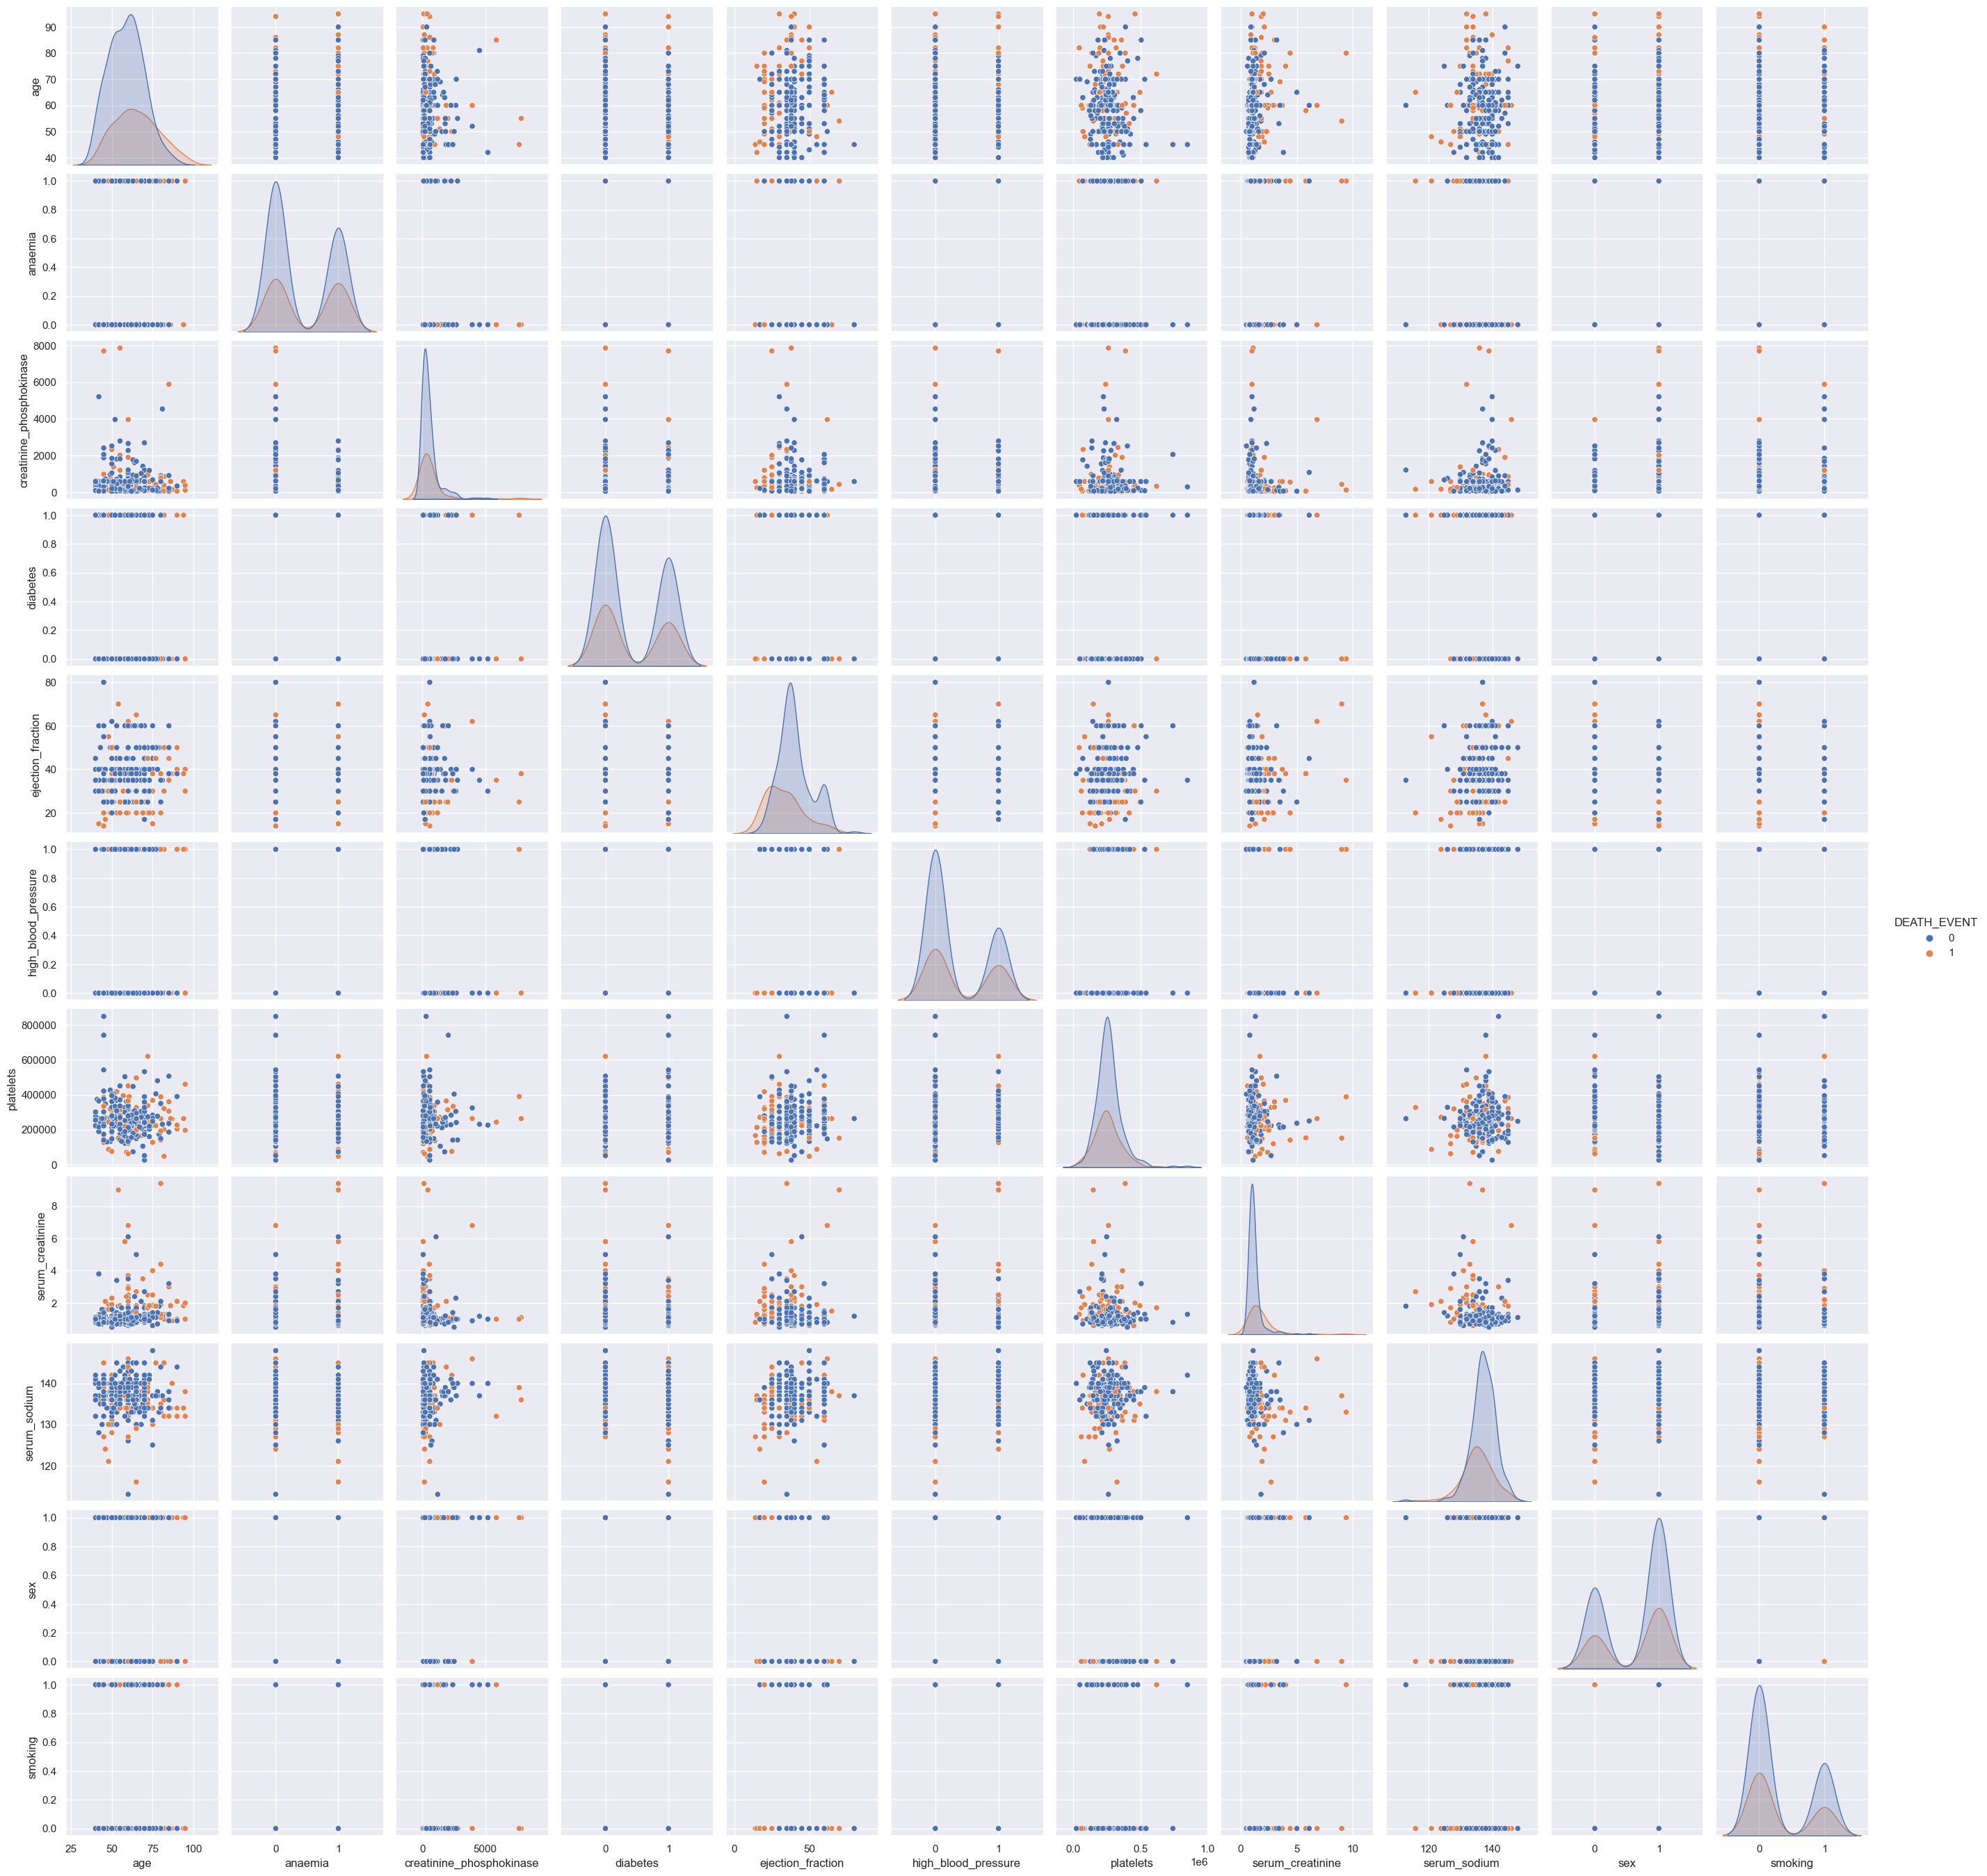

In [61]:
#pairplot
sns.set(font_scale = 1)
sns.set(rc={"figure.figsize":(14, 8)})
sns.pairplot(df, hue='DEATH_EVENT')

## TEST ALGO

In [62]:
import numpy as np
import pandas as pd
import pandas_profiling as pp

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score,recall_score,precision_score,classification_report


from mlxtend.plotting import plot_confusion_matrix
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, Ridge, RidgeCV, RidgeClassifier, Lasso
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import StackingClassifier,RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

In [63]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3, random_state=7319)

In [64]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [65]:
x_train_df=pd.DataFrame(x_train)
x_test_df=pd.DataFrame(x_test)
y_train_df=pd.DataFrame(y_train)
y_test_df=pd.DataFrame(y_test)

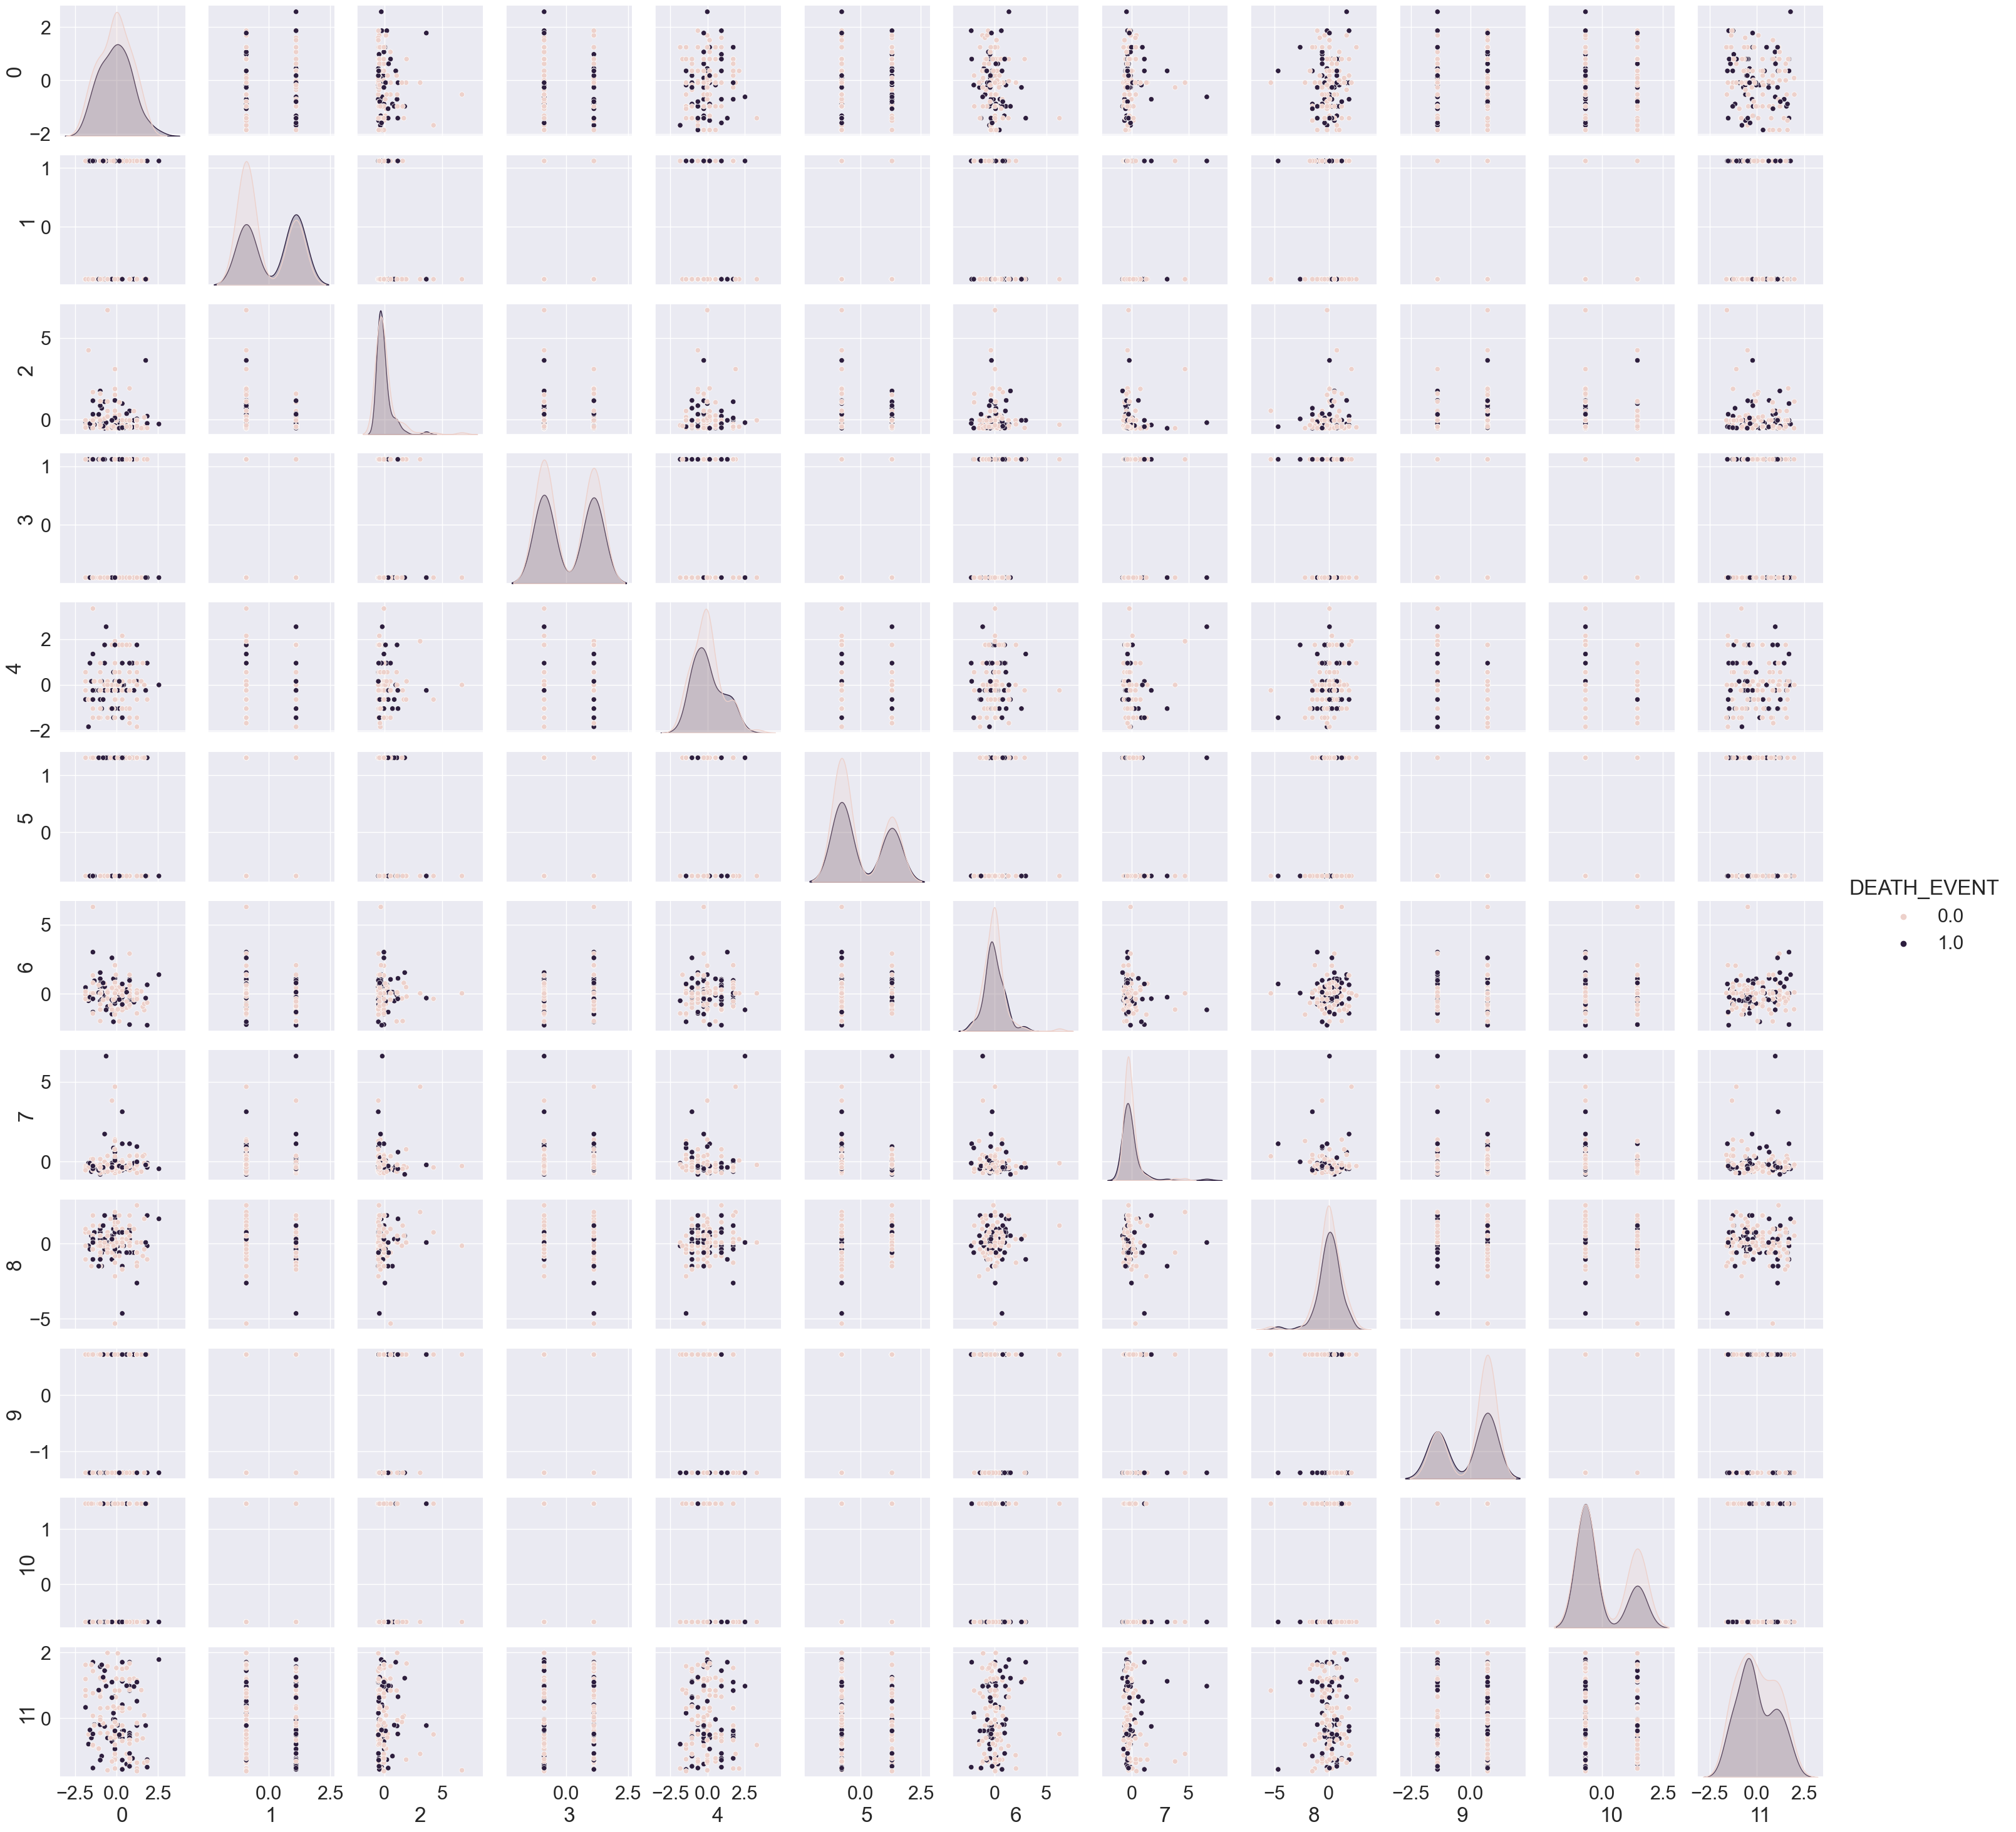

In [66]:
df_train_vis=pd.concat([x_train_df, y_train_df], axis=1)
df_test_vis=pd.concat([x_test_df, y_test_df], axis=1)
sns.set(font_scale = 2)
sns.pairplot(df_train_vis, hue='DEATH_EVENT')

TypeError: list indices must be integers or slices, not str

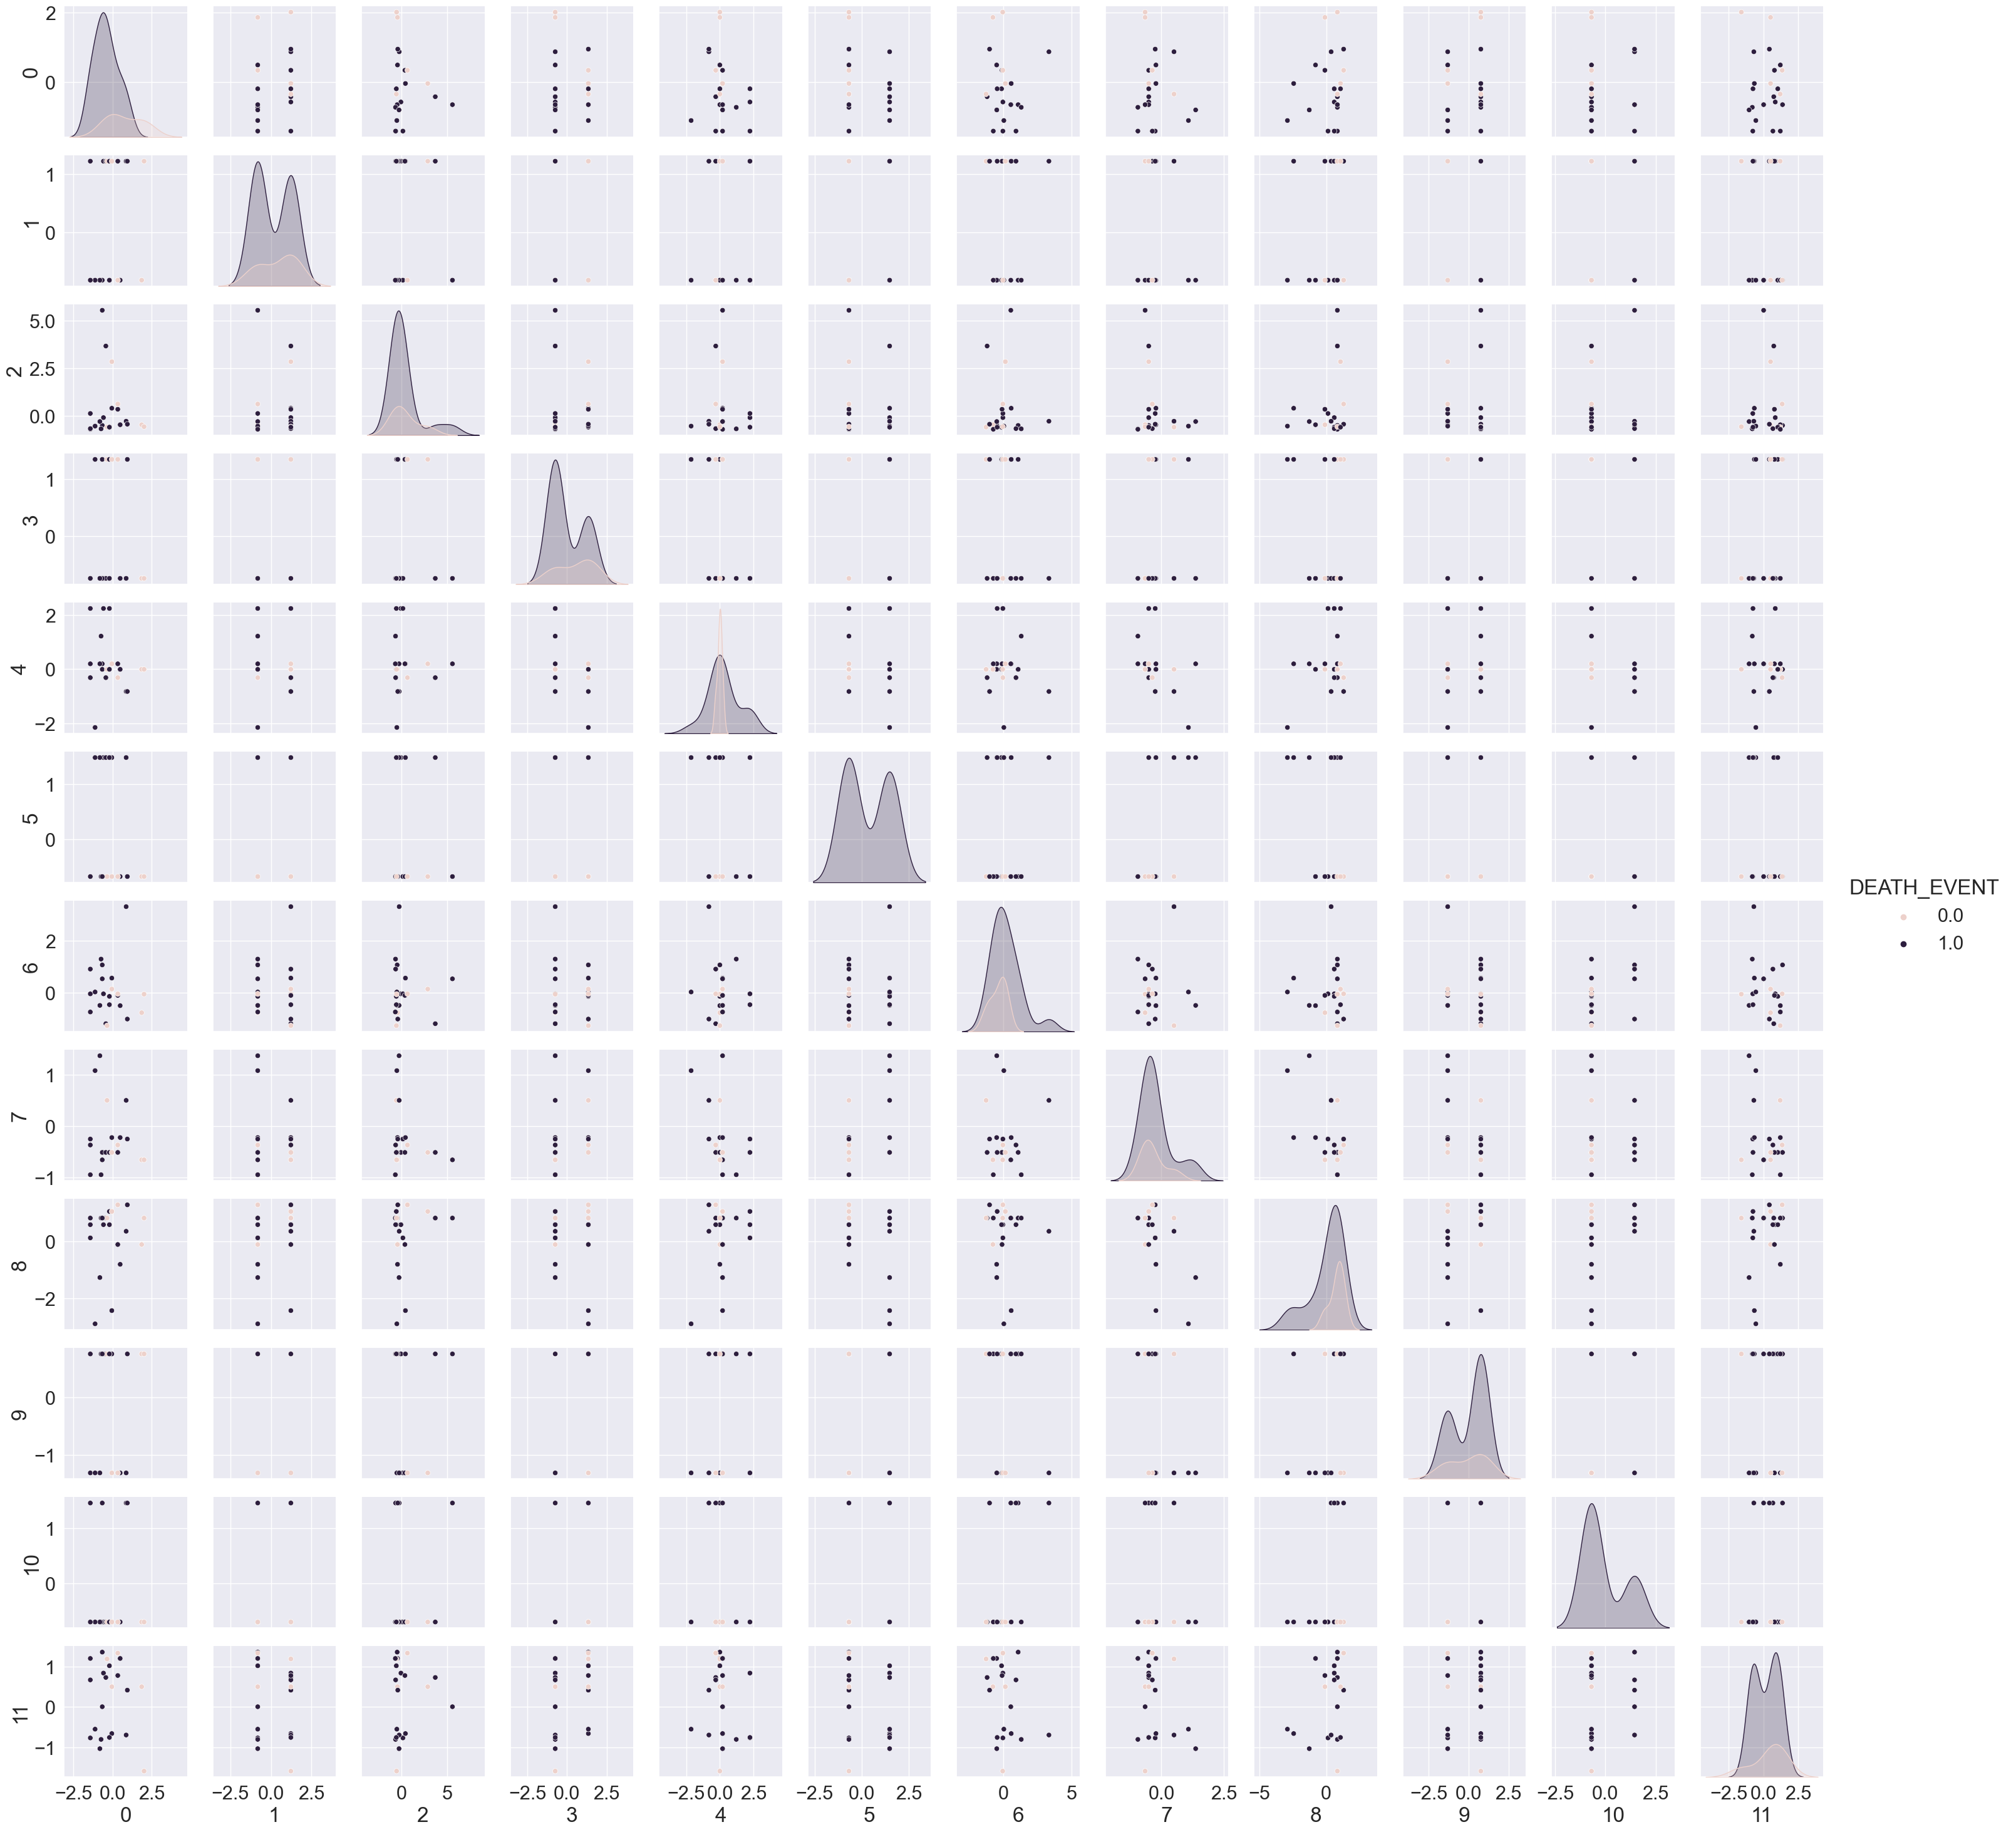

<Figure size 1200x600 with 0 Axes>

In [67]:
sns.pairplot(df_test_vis, hue='DEATH_EVENT')
# Lets see the distribution of number of words in spam and ham emails
plt.figure(figsize=(12,6))
sns.histplot([df_train_vis['DEATH_EVENT'] == 0]['no_words'], color='blue')
sns.histplot(df_train_vis[df_train_vis['DEATH_EVENT'] == 1]['no_words'], color='red')
plt.show()
sns.histplot(df_train_vis[df_train_vis['DEATH_EVENT'] == 0]['no_sent'], color='green')
sns.histplot(df_train_vis[df_train_vis['DEATH_EVENT'] == 1]['no_sent'], color='yellow')
plt.show()

# Training

In [68]:
train_acc_list=[]
test_acc_list=[]
cm=[]
recall=[]
precision=[]
f1=[]
crp=[]
l=[train_acc_list,test_acc_list,cm,recall,precision,f1]

lr = LogisticRegression()
gnb=GaussianNB()
dt=DecisionTreeClassifier()
rf=random_forest = GridSearchCV(estimator=RandomForestClassifier(), param_grid={'n_estimators': [100, 300]}, cv=5)
svc=LinearSVC(dual=False)
knn = GridSearchCV(estimator=KNeighborsClassifier(), param_grid={'n_neighbors': [2, 3]}, cv=10)
models=[lr,gnb,dt,rf,svc,knn]
for model in models:
    model.fit(x_train,y_train)
    train_acc_list.append(round(model.score(x_train,y_train)*100,2))
    y_pred= model.predict(x_test)
    test_ac = accuracy_score(y_test, y_pred)
    cm.append(confusion_matrix(y_test, y_pred))
    test_acc_list.append(round(test_ac*100,2))
    precision.append(precision_score(y_test, y_pred))
    recall.append((y_test, y_pred))
    f1.append((y_test, y_pred))
    print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        68
           1       0.81      1.00      0.90        22

    accuracy                           0.94        90
   macro avg       0.91      0.96      0.93        90
weighted avg       0.95      0.94      0.95        90

              precision    recall  f1-score   support

           0       0.88      0.84      0.86        68
           1       0.56      0.64      0.60        22

    accuracy                           0.79        90
   macro avg       0.72      0.74      0.73        90
weighted avg       0.80      0.79      0.79        90

              precision    recall  f1-score   support

           0       0.90      0.78      0.83        68
           1       0.52      0.73      0.60        22

    accuracy                           0.77        90
   macro avg       0.71      0.75      0.72        90
weighted avg       0.80      0.77      0.78        90

              preci

In [ ]:
for i in cm:
    print(i)
    print('\n')

[[63  5]
 [ 0 22]]


[[57 11]
 [ 8 14]]


[[52 16]
 [ 5 17]]


[[60  8]
 [ 5 17]]


[[63  5]
 [ 0 22]]


[[58 10]
 [11 11]]




In [ ]:
for i,j in zip(models,test_acc_list) :
    print(i,"   ",j,'\n')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)     94.44 

GaussianNB(priors=None, var_smoothing=1e-09)     78.89 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=None, splitter='best')     76.67 

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='g

## STACK MODELS

In [ ]:
for i in models:
    estimators = [
            ('m0', models[0]),
            ('m1', models[1]),
            ('m4', models[4])

            ]
    clf = StackingClassifier(estimators=estimators, final_estimator=models[4])
clf.fit(x_train,y_train)
score=(clf.score(x_test,y_test)*100)
print(score)

95.55555555555556


In [ ]:
y_pred=clf.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
cm

array([[64,  4],
       [ 0, 22]], dtype=int64)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        68
           1       0.85      1.00      0.92        22

    accuracy                           0.96        90
   macro avg       0.92      0.97      0.94        90
weighted avg       0.96      0.96      0.96        90



In [ ]:
y_pred=clf.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
cm

array([[64,  4],
       [ 0, 22]], dtype=int64)

In [ ]:
pr_x = x_test[0:1]
pr_y = y_test[0:1]

In [ ]:
y_pred=clf.predict(pr_x)
cm=confusion_matrix(pr_y,y_pred)
cm

array([[1]], dtype=int64)

In [ ]:
print(classification_report(pr_y, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1

